In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [4]:
X = df.drop('math_score', axis=1)

In [6]:
y = df.math_score

In [18]:
for col in df.columns:
    if df[col].dtype == object:
        print(f"Categories in {col} variable: ", end="")
        print(df[col].unique(), end=" ")
        print(df[col].nunique(),"categories")

Categories in gender variable: ['female' 'male'] 2 categories
Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E'] 5 categories
Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 6 categories
Categories in lunch variable: ['standard' 'free/reduced'] 2 categories
Categories in test_preparation_course variable: ['none' 'completed'] 2 categories


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [24]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [25]:
X = preprocessor.fit_transform(X)

In [27]:
X.shape

(1000, 19)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [29]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    return mae, rmse, r2


In [30]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(),
    "AdaBoost": AdaBoostRegressor()

}

model_list=[]
r2_list =[]

In [36]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-------------------------")

    print('Model performance for test set')
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)


LinearRegression
Model performance for training set
- RMSE: 5.3269
- MAE: 4.2782
- R2 Score: 0.8741
-------------------------
Model performance for test set
- RMSE: 5.4108
- MAE: 4.2279
- R2 Score: 0.8797
Lasso
Model performance for training set
- RMSE: 6.5938
- MAE: 5.2063
- R2 Score: 0.8071
-------------------------
Model performance for test set
- RMSE: 6.5197
- MAE: 5.1579
- R2 Score: 0.8253
Ridge
Model performance for training set
- RMSE: 5.3233
- MAE: 4.2650
- R2 Score: 0.8743
-------------------------
Model performance for test set
- RMSE: 5.3904
- MAE: 4.2111
- R2 Score: 0.8806
K Neighbors Regressor
Model performance for training set
- RMSE: 5.7122
- MAE: 4.5187
- R2 Score: 0.8553
-------------------------
Model performance for test set
- RMSE: 7.2516
- MAE: 5.6160
- R2 Score: 0.7839
Decision Tree
Model performance for training set
- RMSE: 0.2795
- MAE: 0.0187
- R2 Score: 0.9997
-------------------------
Model performance for test set
- RMSE: 7.7195
- MAE: 6.1500
- R2 Score: 0.

In [37]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', "R2 score"]).sort_values(by=["R2 score"],ascending=False)

,Model name,R2 score
2,Ridge,0.880593
0,LinearRegression,0.879689
5,Random Forest,0.851635
7,CatBoost,0.851632
8,AdaBoost,0.842806
6,XGBoost,0.827797
1,Lasso,0.825320
3,K Neighbors Regressor,0.783898
4,Decision Tree,0.755115


In [38]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) *100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


Text(0, 0.5, 'predicted')

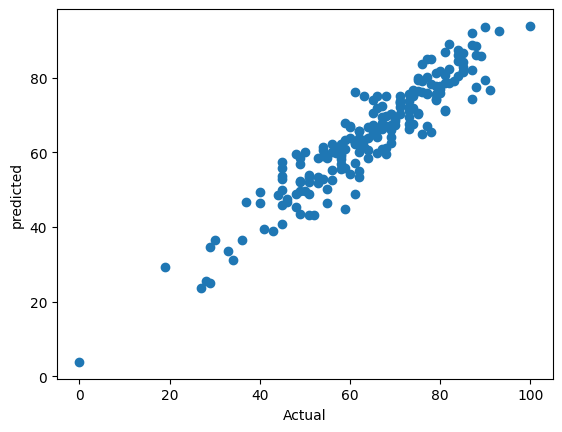

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel("predicted")

In [40]:
pred_df = pd.DataFrame({
    "Actual value":y_test, 
    "Predicted value":y_pred,
    "Difference": y_test - y_pred})

In [48]:
pred_df.sample(5)

,Actual value,Predicted value,Difference
411,84,87.500000,-3.500000
595,56,62.296875,-6.296875
139,71,70.218750,0.781250
439,89,85.765625,3.234375
559,73,69.437500,3.562500


In [49]:
pred_df.Difference.std()

5.4204463115344685

(array([ 1.,  0.,  1.,  2.,  1.,  5.,  4.,  5.,  8.,  6.,  6., 14., 12.,
        14., 19., 14., 15., 15., 12., 12.,  7.,  6.,  5.,  1.,  4.,  3.,
         3.,  1.,  2.,  2.]),
 array([-15.234375  , -14.25104167, -13.26770833, -12.284375  ,
        -11.30104167, -10.31770833,  -9.334375  ,  -8.35104167,
         -7.36770833,  -6.384375  ,  -5.40104167,  -4.41770833,
         -3.434375  ,  -2.45104167,  -1.46770833,  -0.484375  ,
          0.49895833,   1.48229167,   2.465625  ,   3.44895833,
          4.43229167,   5.415625  ,   6.39895833,   7.38229167,
          8.365625  ,   9.34895833,  10.33229167,  11.315625  ,
         12.29895833,  13.28229167,  14.265625  ]),
 <BarContainer object of 30 artists>)

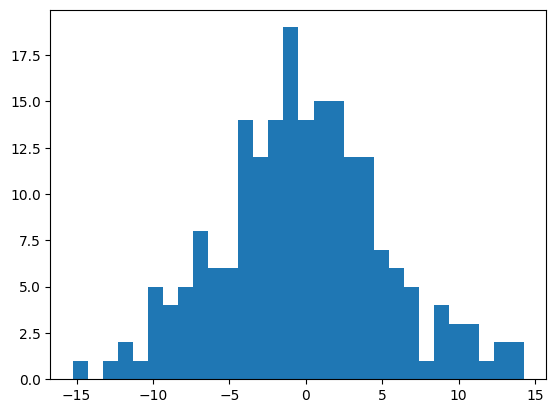

In [47]:
plt.hist(pred_df["Difference"], bins=30)